# Import Packages

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,log_loss,accuracy_score,confusion_matrix,roc_curve,auc, precision_score,classification_report,roc_auc_score,cohen_kappa_score
import warnings
from scipy.stats import chi2
import eli5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
warnings.filterwarnings("ignore", category=DeprecationWarning)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest 
warnings.simplefilter("ignore")
from scipy import stats
from scipy.stats import distributions as dists
from scipy.stats import chi2_contingency
import researchpy as rp
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from eli5.sklearn import PermutationImportance
import scipy.stats as scipystats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer 
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import copy
import math
import time
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [112]:
titanic=pd.read_csv("D:/DS Training Videos/ML algo script/2.Logistic Regression/titanic dataset/train.csv",sep=',')
test=pd.read_csv("D:/DS Training Videos/ML algo script/2.Logistic Regression/titanic dataset/test.csv",sep=',')
print("Shape of dataframe:",titanic.shape)
print("Shape of testframe:",test.shape)

Shape of dataframe: (891, 12)
Shape of testframe: (418, 11)


In [113]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [114]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing value columnwise

In [115]:
missing=titanic.isnull().sum()

In [116]:
missing[missing>0].sort_values(axis=0,ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

# Missing value visualisation

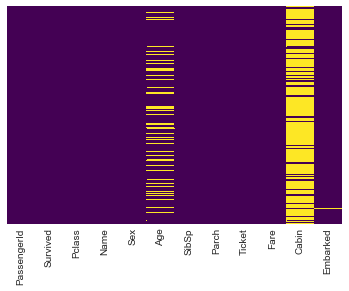

In [117]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

        1.Drop Cabin column as 687 out of 891 rows are missing
        2.Drop Passenger Id and name and Ticket columns of common sense

In [118]:
titanic=titanic.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

# Data Imputation

    1.Replace nan values of Embarked with mode as there are only 2 values missing
    2.Replace nan values of Age with groupby mean with Pclass
    

In [119]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [120]:
titanic.groupby('Pclass')['Age'].agg(lambda x: x.median(skipna=True))

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

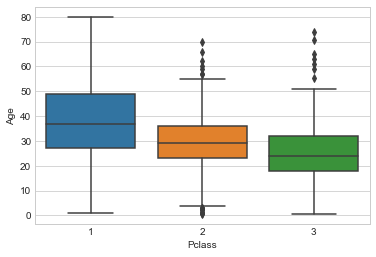

In [121]:
sns.boxplot(titanic['Pclass'],titanic['Age'])

In [122]:
titanic.Age= titanic.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.median()))

# Remove Outliers

     1.Z-score
     2.IQR

In [123]:
z = np.abs(stats.zscore(titanic['Age']))
#print(z)
threshold = 3
print(np.where(z > 3))

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64),)


In [124]:
titanic=titanic.drop([96, 116, 493, 630, 672, 745, 851])

In [125]:
Q1 = titanic.Age.quantile(0.25)
Q3 = titanic.Age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

14.0


In [126]:
titanic=titanic[~(titanic.Age < (Q1 - 1.5 * IQR)) |(titanic.Age > (Q3 + 1.5 * IQR))]

In [127]:
titanic.shape

(877, 8)

          No missing values for any columns post imputation

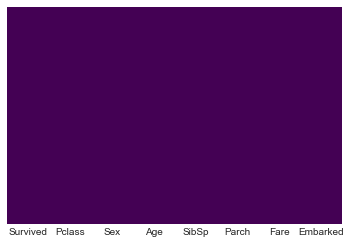

In [128]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Histogram for Continous variables

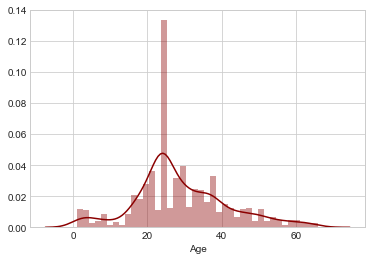

In [129]:
sns.distplot(titanic['Age'].dropna(),kde=True,color='darkred',bins=40)

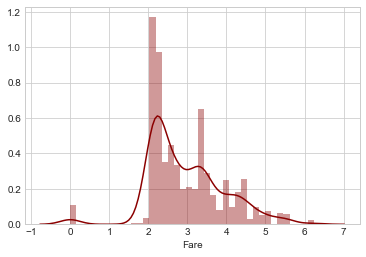

In [130]:
sns.distplot(np.log(titanic['Fare']+1),kde=True,color='darkred',bins=40)

# Bar graph for categorical variables

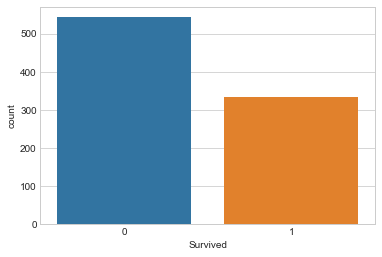

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

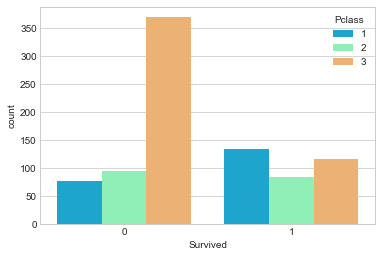

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

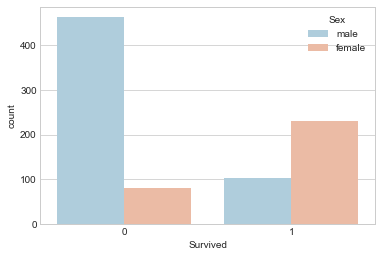

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

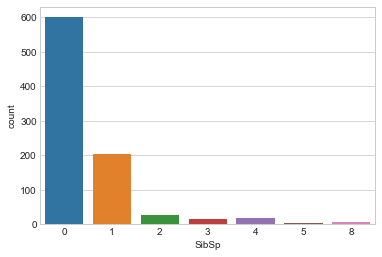

In [134]:
sns.countplot(x='SibSp',data=titanic)

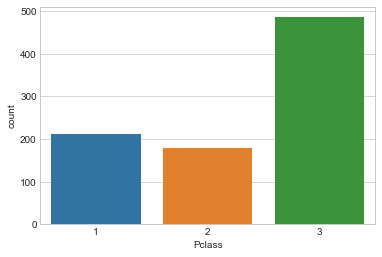

In [135]:
sns.countplot(x='Pclass',data=titanic)

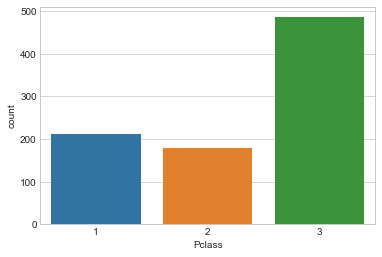

In [136]:
sns.countplot(x='Pclass',data=titanic)

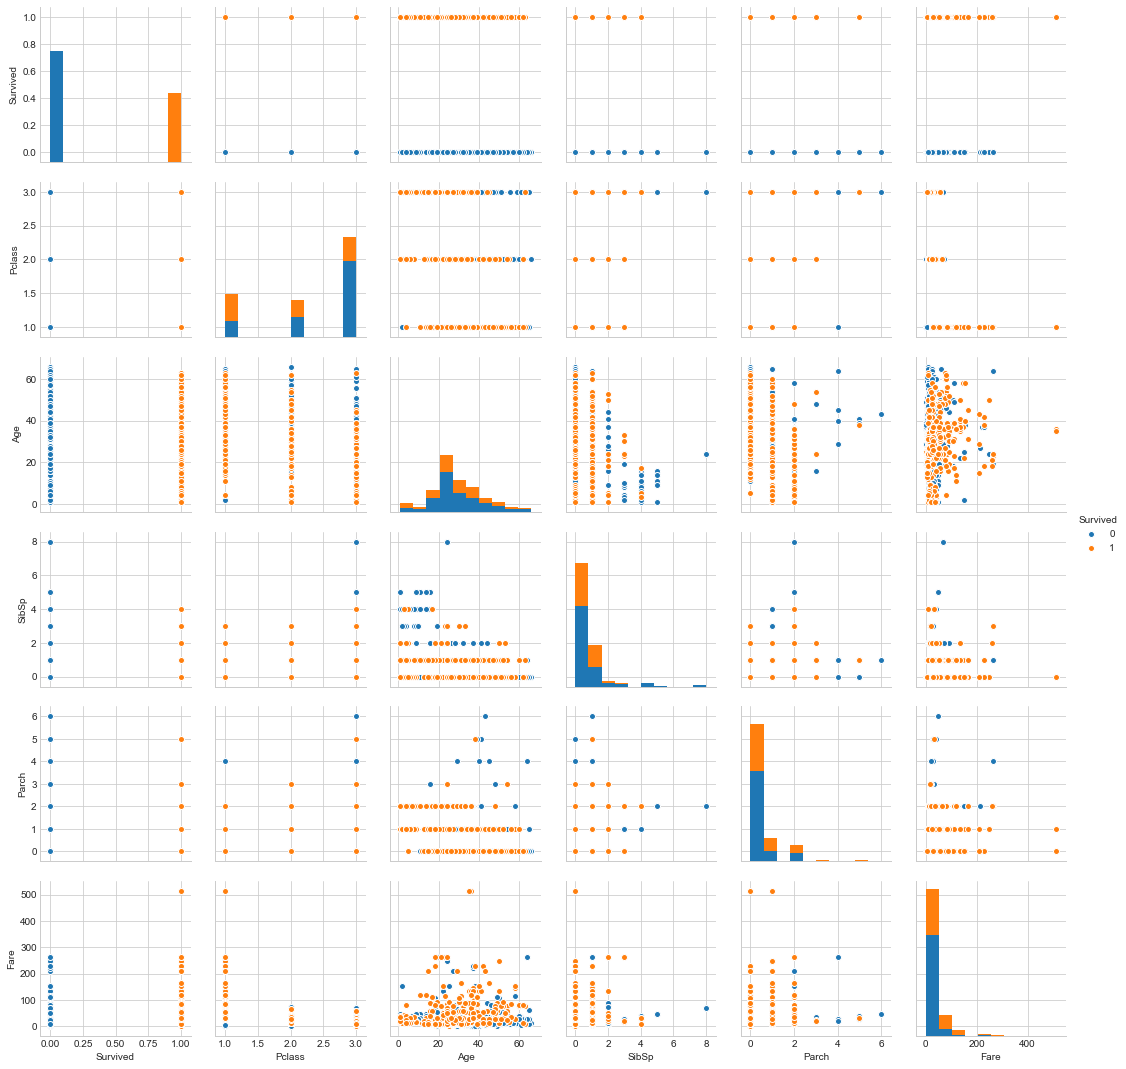

In [137]:
sns.pairplot(titanic,hue='Survived')

Data points are non-linear seperable so we can use DT,RF,AB,GBM,XGBM,KNN,SVM,NB

In [138]:
def onewayanova_withembarked(a):
    df_anova = titanic[[a,'Embarked']]
    grps = pd.unique(df_anova.Embarked.values)
    d_data = {grp:df_anova[a][df_anova.Embarked == grp] for grp in grps}
    F, p = stats.f_oneway(d_data['S'], d_data['C'],d_data['Q'])
    if p<=0.05:
         print("p-value between {} and Embarked is {}".format(a,p))

In [139]:
onewayanova_withembarked('Age')
onewayanova_withembarked('Fare')

p-value between Age and Embarked is 0.008526054117381164
p-value between Fare and Embarked is 5.439982035029433e-17


In [140]:
titanic.Embarked.head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [141]:
titanic=pd.get_dummies(data=titanic, columns=['Sex', 'Embarked'],drop_first=True)

In [142]:
titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [143]:
titanic['Survived'].value_counts()

0    543
1    334
Name: Survived, dtype: int64

# Correlation between Continous variables

There are only two continous variables Age and Fare 

In [144]:
hcorr =titanic.corr()
hcorr=hcorr.loc[['Age','Fare'],['Age','Fare']]
hcorr

,Age,Fare
Age,1.000000,0.135625
Fare,0.135625,1.000000


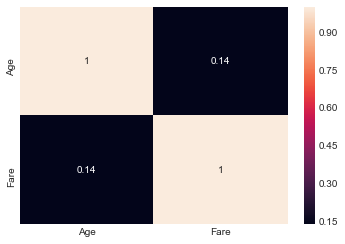

In [39]:
sns.heatmap(hcorr,annot=True)

        There is no correlation between them as it is 0.12

# Correlation betwee categorical variables

 CHISQ-TEST is used to find correlation between two categorical variables

In [40]:
def chitest(a,b):
    dataset_table=pd.crosstab(a,b)
    Observed_Values = dataset_table.values 
    val=stats.chi2_contingency(dataset_table)
    Expected_Values=val[3]
    no_of_rows=len(dataset_table.iloc[0:dataset_table.shape[0],0])
    no_of_columns=len(dataset_table.iloc[0,0:dataset_table.shape[1]])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    alpha = 0.05
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    p_value=chi2.cdf(x=chi_square_statistic,df=ddof)
    return p_value

In [41]:
x=titanic.loc[:,['Survived', 'Pclass', 'SibSp', 'Parch','Embarked_Q','Embarked_S', 'Sex_male']]
for i,c in enumerate(x.columns):
    for j,d in enumerate(x.columns[1:]):
        if c!=d:
            p_value=chitest(x[c],x[d])
            if p_value<=0.05:
                print("p-value between {} and {} is {}".format(c,d,p_value))             
        

p-value between Pclass and Parch is 0.02558669815259354
p-value between Embarked_S and SibSp is 0.04958103493184174
p-value between Embarked_S and Parch is 0.002611484702601838


# Correlation between Categorical and Numeric variables

 One way ANOVA Test is used to find categorical and continous variable

In [42]:
def onewayanova_withsurvived(a):
    df_anova = titanic[[a,'Survived']]
    grps = pd.unique(df_anova.Survived.values)
    d_data = {grp:df_anova[a][df_anova.Survived == grp] for grp in grps}
    F, p = stats.f_oneway(d_data[0], d_data[1])
    if p<=0.05:
         print("p-value between {} and Survived is {}".format(a,p))

In [43]:
def onewayanova_withPclass(a):
    df_anova = titanic[[a,'Pclass']]
    grps = pd.unique(df_anova.Pclass.values)
    d_data = {grp:df_anova[a][df_anova.Pclass == grp] for grp in grps}
    F, p = stats.f_oneway(d_data[1], d_data[2],d_data[3])
    if p<=0.05:
         print("p-value between {} and Pclass is {}".format(a,p))

In [44]:
def onewayanova_withSex(a):
    df_anova = titanic[[a,'Sex_male']]
    grps = pd.unique(df_anova.Sex_male.values)
    d_data = {grp:df_anova[a][df_anova.Sex_male == grp] for grp in grps}
    F, p = stats.f_oneway(d_data[0], d_data[1])
    if p<=0.05:
         print("p-value between {} and Sex_male is {}".format(a,p))

In [45]:
def onewayanova_withSibSp(a):
    df_anova = titanic[[a,'SibSp']]
    grps = pd.unique(df_anova.SibSp.values)
    d_data = {grp:df_anova[a][df_anova.SibSp == grp] for grp in grps}
    F, p = stats.f_oneway(d_data[1], d_data[2],d_data[3])
    if p<=0.05:
         print("p-value between {} and SibSp is {}".format(a,p))

In [46]:
def onewayanova_withParch(a):
    df_anova = titanic[[a,'Parch']]
    grps = pd.unique(df_anova.Parch.values)
    d_data = {grp:df_anova[a][df_anova.Parch == grp] for grp in grps}
    F, p = stats.f_oneway(d_data[1], d_data[2],d_data[3])
    if p<=0.05:
         print("p-value between {} and Parch is {}".format(a,p))

In [47]:
onewayanova_withsurvived('Age')
onewayanova_withsurvived('Fare')
onewayanova_withPclass('Age')
onewayanova_withPclass('Fare')
onewayanova_withSex('Age')
onewayanova_withSex('Fare')
onewayanova_withSibSp('Age')
onewayanova_withSibSp('Fare')
onewayanova_withParch('Age')
onewayanova_withParch('Fare')

p-value between Fare and Survived is 5.537409360532686e-15
p-value between Age and Pclass is 7.659447230557947e-38
p-value between Fare and Pclass is 2.674603058855254e-83
p-value between Age and Sex_male is 0.04989043898561575
p-value between Fare and Sex_male is 2.981502548733296e-08
p-value between Age and SibSp is 0.0001314697170126256
p-value between Age and Parch is 0.005239803858443495


# Correlated variables

    p-value between Fare and Survived is 6.120189341921873e-15
    p-value between Fare and Embarked is 1.6027870913034334e-16
    p-value between Fare and Sex_male is 4.230867870041279e-08
    p-value between Fare and Pclass is 1.0313763209141171e-84
    p-value between Age and Sex_male is 0.016290279138740718
    p-value between Age and Pclass is 9.588015423200795e-36
    p-value between Age and SibSp is 0.0001345477830172999
    p-value between Age and Parch is 0.008878883022022688
    p-value between Pclass and Parch is 0.02869330420552005
    p-value between Embarked_S and Parch is 0.0070495449563795776 
    p-value between Embarked_S and SibSp is 0.01551722794058571 

 Dropping column fair as it is highly correlated with Pclass and Sex

Embarked_Q and PArch are removed as RFE and Permutation combination considered it as less important features

In [145]:
titanic=titanic.drop(['Fare','Embarked_Q','Parch'],axis=1)

In [49]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S'], dtype='object')

# Hyper parameter tuning and fit logistic regression

In [146]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' :  [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [147]:
# Scaled feature 
titanic['Age'] = (titanic['Age']-titanic['Age'].mean())/titanic['Age'].std()
#titanic['Fare'] = (titanic['Fare']-titanic['Fare'].mean())/titanic['Fare'].std()
titanic.Age.head()

0   -0.554910
1    0.723136
2   -0.235398
3    0.483503
4    0.483503
Name: Age, dtype: float64

In [52]:
x=titanic.iloc[:,1:]
y=titanic.iloc[:,:1]
logreg=LogisticRegression()
#logreg.fit(x,y)
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(x,y)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  1.4min finished


In [53]:
best_clf.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [54]:
log = LogisticRegression(C=0.1,max_iter=100,penalty='l2',solver= 'lbfgs')
log.fit(x,y)

LogisticRegression(C=0.1)

In [55]:
perm = PermutationImportance(log).fit(x, y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.2198 ± 0.0164,Sex_male
0.1202 ± 0.0101,Pclass
0.0265 ± 0.0070,Age
0.0187 ± 0.0090,SibSp
0.0068 ± 0.0092,Embarked_S


In [56]:
# slope
print("Slope:")
print(log.coef_)
# slope
print("Intercept:")
print(log.intercept_)

Slope:
[[-0.96920512 -0.36108265 -0.23451193 -2.01103385 -0.33055305]]
Intercept:
[3.28559161]


# Model Prediction

In [422]:
def probability_prediction(test,threshold):
       return np.where(log.predict_proba(test)[:,1] > threshold, 1, 0)

In [423]:
y_pred=probability_prediction(x,0.46)
print("Predicted class:")
#y_pred

Predicted class:


In [424]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S'], dtype='object')

# Metrices like log loss,ROC-AUC curve,Confusion matrix,

In [425]:
def logloss(test,prob,pred):
    return(log_loss(test,prob),accuracy_score(test,pred.astype(int)),confusion_matrix(test,pred))

In [426]:
logloss,accuracyscore,confusionmatrix=logloss(y,log.predict_proba(x)[:,1],y_pred)
print("Logloss:",logloss)
print("Accuracyscore:",accuracyscore)
print("Confusion matrix:")
print(confusionmatrix)

Logloss: 0.44761672472272995
Accuracyscore: 0.8050171037628279
Confusion matrix:
[[465  78]
 [ 93 241]]


In [427]:
# Sensitivity
def confusion__matrix(confusion):
    TP=confusion[1,1]
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    Accuracy= (TP+TN)/(TP+TN+FP+FN)
    Recall= TP/(TP+FN) # When the actual value is +ve, how often is the prediction correct ? 
    Specificity= TN/ float(TN+FP) # When the actual value is -ve, how often is the prediction correct ?  Specificity
    Precision= TP/(TP+FP)   # when a postive value is predicted, how often is the prediction correct ?
    return(Accuracy,Recall,Specificity,Precision)

In [428]:
Accuracy,Recall,Specificity,Precision=confusion__matrix(confusionmatrix)
print("Accuracy:",Accuracy)
print("Recall:",Recall)
print("Specificity:",Specificity)
print("Precision:",Precision)

Accuracy: 0.8050171037628279
Recall: 0.7215568862275449
Specificity: 0.856353591160221
Precision: 0.7554858934169278


In [429]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       543
           1       0.76      0.72      0.74       334

    accuracy                           0.81       877
   macro avg       0.79      0.79      0.79       877
weighted avg       0.80      0.81      0.80       877



In [318]:
AccuracyScore =cross_val_score(log,x,y,cv=10,n_jobs=-1)
RocAucCurve= cross_val_score(log,x,y,cv=10, scoring='roc_auc')
print("AccuracyScore:",AccuracyScore)
print("Std of AccuracyScore:",np.std(AccuracyScore))
print("Mean of AccuracyScore:",np.mean(AccuracyScore))
print("RocCurveScore:",RocAucCurve)
print("Std of RocAucCurve",np.std(RocAucCurve))
print("Mean of RocAucCurve",np.mean(RocAucCurve))

AccuracyScore: [0.80681818 0.79545455 0.80681818 0.81818182 0.79545455 0.79545455
 0.81818182 0.8045977  0.85057471 0.85057471]
Std of AccuracyScore: 0.019832576196622414
Mean of AccuracyScore: 0.8142110762800417
RocCurveScore: [0.88402204 0.81404959 0.83360882 0.85103486 0.84286492 0.84776688
 0.87200436 0.84876543 0.89393939 0.87429854]
Std of RocAucCurve 0.023224043849659873
Mean of RocAucCurve 0.856235483173986


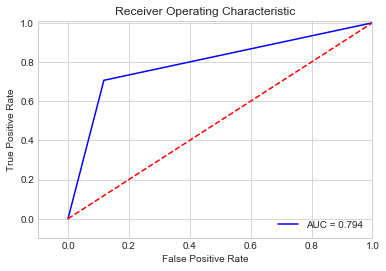

In [319]:
fpr, tpr, thresholds = roc_curve(y, log.predict(x))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [320]:
from sklearn.feature_selection import RFE
rfe = RFE(log,5)
r1 = rfe.fit(x,y)
print (r1)
print(r1.support_)
print(r1.ranking_)
print(r1.n_features_)
#print("Num Features: %d") % r1.n_features_
#print("Selected Features: ") % r1.support_
#print("Feature Ranking: %s") % r1.ranking_

RFE(estimator=LogisticRegression(C=0.1), n_features_to_select=5)
[ True  True  True  True  True]
[1 1 1 1 1]
5


In [321]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S'], dtype='object')

# Decision Tree

In [333]:
params = {'max_leaf_nodes': np.arange(1, 10), 'min_samples_split': [2, 3, 4],
          'max_depth' : np.arange(1, 10),'criterion':['gain','entropy']}

In [334]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz,export_text
import graphviz 
from sklearn import tree

In [335]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(x, y)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1458 out of 1458 | elapsed:    6.3s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gain', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [336]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9)

In [337]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9)
dtree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9)

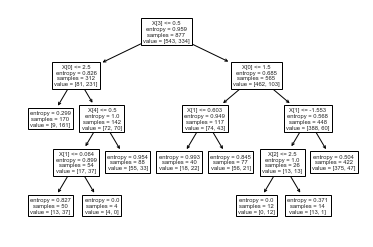

In [338]:
tree.plot_tree(dtree) 
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("Desktop/titanic") 

In [339]:
dt_score_train = dtree.score(x, y)
print(dt_score_train)
dt_auc_score_train = roc_auc_score(y, dtree.predict(x))
print (dt_auc_score_train)

0.8380843785632839
0.8104729766985367


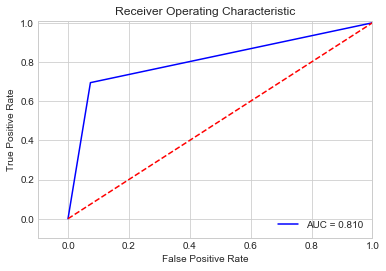

In [340]:
fpr, tpr, thresholds = roc_curve(y, dtree.predict(x))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RandomForest

In [341]:
paramgrid = {'max_leaf_nodes': np.arange(1, 10), 'min_samples_split': [2, 3, 4],'max_depth' : np.arange(1, 10),'bootstrap': [True, False],'n_estimators': [100,200,400]}

In [342]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf = GridSearchCV(rf, param_grid = paramgrid, cv = 5, verbose=True, n_jobs=-1)
    
rf.fit(x,y)


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 1286 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1836 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2486 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3236 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4086 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5036 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6086 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 7236 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 7290 out of 7290 | elapsed:  7.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 400]},
             verbose=True)

In [347]:
rf.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_leaf_nodes': 8,
 'min_samples_split': 4,
 'n_estimators': 100}

In [351]:
best_model = rf.best_estimator_
best_model

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, min_samples_split=4)

In [362]:
rf=RandomForestClassifier(max_depth=8, max_leaf_nodes=8, min_samples_split=4,n_estimators=100,bootstrap=True,oob_score = True)
rf.fit(x,y)

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, min_samples_split=4,
                       oob_score=True)

In [363]:
importances=rf.feature_importances_
print(importances)
std = np.std([rf.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(x.columns[i])
print(x.columns)
print(rf.score(x,y))

[0.21197476 0.08940451 0.04468294 0.62469608 0.0292417 ]
Index(['Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S'], dtype='object')
0.8346636259977195


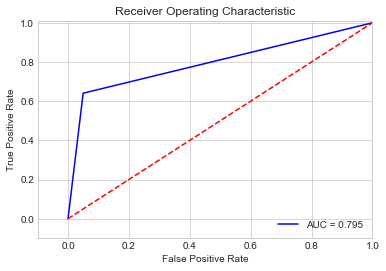

In [354]:
fpr, tpr, thresholds = roc_curve(y, rf.predict(x))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [355]:
cr = classification_report(y,  rf.predict(x))
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       543
           1       0.89      0.64      0.74       334

    accuracy                           0.83       877
   macro avg       0.85      0.80      0.81       877
weighted avg       0.84      0.83      0.83       877



# XGBOOST

In [77]:
params={
 "learning_rate"    : np.arange(0, 1, 0.1) ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : np.arange(0, 1, 0.1),
 "colsample_bytree" : np.arange(0, 1, 0.1)   
}

In [78]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x,y)
random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   20.3s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   20.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   20.6s finished


{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.7000000000000001,
 'gamma': 0.9,
 'colsample_bytree': 0.8}

In [79]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7000000000000001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
classifer=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              gamma=0.6000000000000001, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
classifier=classifer.fit(x,y)

In [81]:
ypred=classifer.predict(x)

In [82]:
print("Training Accuracy: ", classifer.score(x, y))

Training Accuracy:  0.855188141391106


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       543
           1       0.86      0.74      0.79       334

    accuracy                           0.86       877
   macro avg       0.86      0.83      0.84       877
weighted avg       0.86      0.86      0.85       877



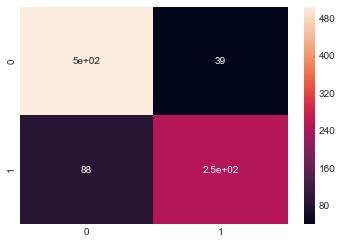

In [83]:
# making a classification report
cr = classification_report(y,  ypred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y, ypred)
sns.heatmap(cm, annot = True)

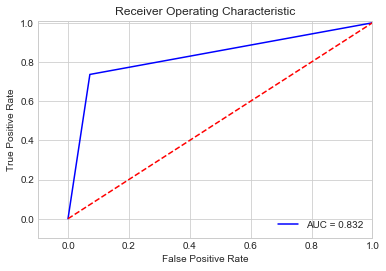

In [361]:
fpr, tpr, thresholds = roc_curve(y, classifer.predict(x))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Since accruacy is between 0.8 to 0.85 its better to change threshold and find optimal threshold

In [364]:
pred=[]
for model in [rf,log,dtree,classifier]:
    pred.append(pd.Series(model.predict_proba(x)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y,final_prediction)))

Ensemble test roc-auc: 0.8891995015493874


In [365]:
fpr, tpr, thresholds = roc_curve(y, final_prediction)
thresholds

array([1.93401172, 0.93401172, 0.92743331, 0.9269936 , 0.92357177,
       0.92125183, 0.92079634, 0.92067481, 0.917567  , 0.91683737,
       0.91658904, 0.91639606, 0.91387458, 0.91361036, 0.9089025 ,
       0.90879271, 0.90840373, 0.90775652, 0.90642986, 0.90612193,
       0.90534568, 0.9050415 , 0.90251804, 0.90198742, 0.90178547,
       0.89957762, 0.89932992, 0.89278454, 0.89119152, 0.89093121,
       0.88978993, 0.88135952, 0.88106771, 0.87804899, 0.87724   ,
       0.86518642, 0.86495372, 0.86488134, 0.86039402, 0.86005852,
       0.85387079, 0.85330384, 0.85323193, 0.85222432, 0.850028  ,
       0.84799782, 0.84617282, 0.837099  , 0.83383891, 0.83135619,
       0.82869115, 0.82739367, 0.82614572, 0.82598151, 0.82231104,
       0.81965648, 0.81776283, 0.80726327, 0.80390487, 0.79607606,
       0.78656929, 0.76834059, 0.73023029, 0.69970963, 0.69835181,
       0.68773268, 0.68653488, 0.67900449, 0.6787634 , 0.67716912,
       0.67441841, 0.67166948, 0.67001636, 0.66667025, 0.66267

In [369]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(20)

,thresholds,accuracy
109,0.467116,0.852908
111,0.464675,0.851767
110,0.466655,0.851767
108,0.467753,0.851767
112,0.463019,0.850627
101,0.473682,0.850627
104,0.471668,0.850627
103,0.472819,0.849487
102,0.473452,0.849487
113,0.459848,0.849487


# K-Nearest Neighbour

In [62]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
    pred_i = knn.predict(x)
    #print(pred_i)
    error_rate.append(np.mean(pred_i !=y.values))

Text(0,0.5,'Error Rate')

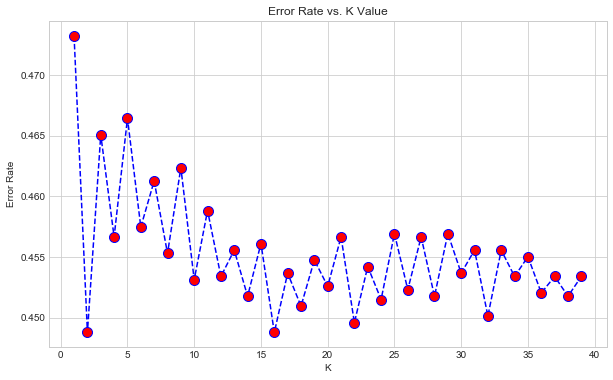

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(x,y)
pred = knn.predict(x)

print('WITH K=16')
print('\n')
conf=confusion_matrix(y,pred)
print(confusion_matrix(y,pred))
print('\n')
print(classification_report(y,pred))

WITH K=16


[[505  38]
 [122 212]]


              precision    recall  f1-score   support

           0       0.81      0.93      0.86       543
           1       0.85      0.63      0.73       334

    accuracy                           0.82       877
   macro avg       0.83      0.78      0.79       877
weighted avg       0.82      0.82      0.81       877



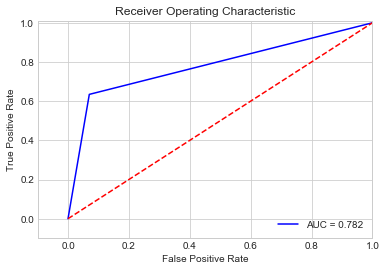

In [66]:
fpr, tpr, thresholds = roc_curve(y, knn.predict(x))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gaussian NB

In [148]:

# Importing PCA 
from sklearn.decomposition import PCA 
  
# Let's say, components = 2 
pca = PCA(n_components = 2) 
pca.fit(titanic) 
x_pca = pca.transform(titanic) 
  
x_pca.shape 

(877, 2)

In [154]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_pca,y).predict(x_pca) # Chained FIT and PRED

In [155]:
conf=confusion_matrix(y,y_pred)
print(confusion_matrix(y,y_pred))
print('\n')
print(classification_report(y,y_pred))

[[512  31]
 [253  81]]


              precision    recall  f1-score   support

           0       0.67      0.94      0.78       543
           1       0.72      0.24      0.36       334

    accuracy                           0.68       877
   macro avg       0.70      0.59      0.57       877
weighted avg       0.69      0.68      0.62       877



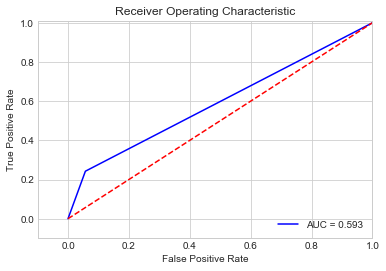

In [157]:
fpr, tpr, thresholds = roc_curve(y, gnb.predict(x_pca))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
surv=test['PassengerId']

In [87]:
test=test.drop(['Name','Cabin','Fare','PassengerId'],axis=1)

In [88]:
test.Age= test.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.mean()))

In [89]:
test=pd.get_dummies(data=test, columns=['Sex', 'Embarked'],drop_first=True)

In [90]:
test=test.drop(['Embarked_Q','Parch','Ticket'],axis=1)

In [91]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S'], dtype='object')

In [92]:
test.head(10)

,Pclass,Age,SibSp,Sex_male,Embarked_S
0,3,34.5,0,1,0
1,3,47.0,1,0,1
2,2,62.0,0,1,0
3,3,27.0,0,1,1
4,3,22.0,1,0,1
5,3,14.0,0,1,1
6,3,30.0,0,0,0
7,2,26.0,1,1,1
8,3,18.0,0,0,0
9,3,21.0,2,1,1


In [93]:
ypred=classifer.predict(test)

In [94]:
test['PassengerId']=surv

In [97]:
test.head()

,Pclass,Age,SibSp,Sex_male,Embarked_S,PassengerId
0,3,34.5,0,1,0,892
1,3,47.0,1,0,1,893
2,2,62.0,0,1,0,894
3,3,27.0,0,1,1,895
4,3,22.0,1,0,1,896


In [96]:
submission = pd.concat([pd.Series(test['PassengerId']), pd.Series(ypred)],
                        axis=1)

In [100]:
submission.columns = ['PassengerId', 'Survived']

In [101]:
submission.to_csv("titanictest.csv")

In [102]:
pwd

'C:\\Users\\Prakash K'